In [ ]:
# Import the `pandas` module as "pd"
import pandas as pd

In [ ]:
# Read in `road-accidents.csv' sep as data in raw format
df = pd.read_csv('road-accidents.csv',comment='#', sep='|')

In [ ]:
df.shape

(51, 5)

In [ ]:
# Generate an overview of the DataFrame
car_acc_information = df.info()
print(car_acc_information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [ ]:
#Display the first five rows of the DataFrame
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [ ]:
#Display the last five rows of the DataFrame
df.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [ ]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

In [ ]:
df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
count,51.000000,51.000000,51.000000,51.00000,51.000000
mean,15.790196,31.725490,30.686275,88.72549,1.078431
std,4.122002,9.633438,5.132213,6.96011,0.890913
min,5.900000,13.000000,16.000000,76.00000,0.000000
25%,12.750000,23.000000,28.000000,83.50000,0.000000
50%,15.600000,34.000000,30.000000,88.00000,1.000000
75%,18.500000,38.000000,33.000000,95.00000,2.000000
max,23.900000,54.000000,44.000000,100.00000,2.000000


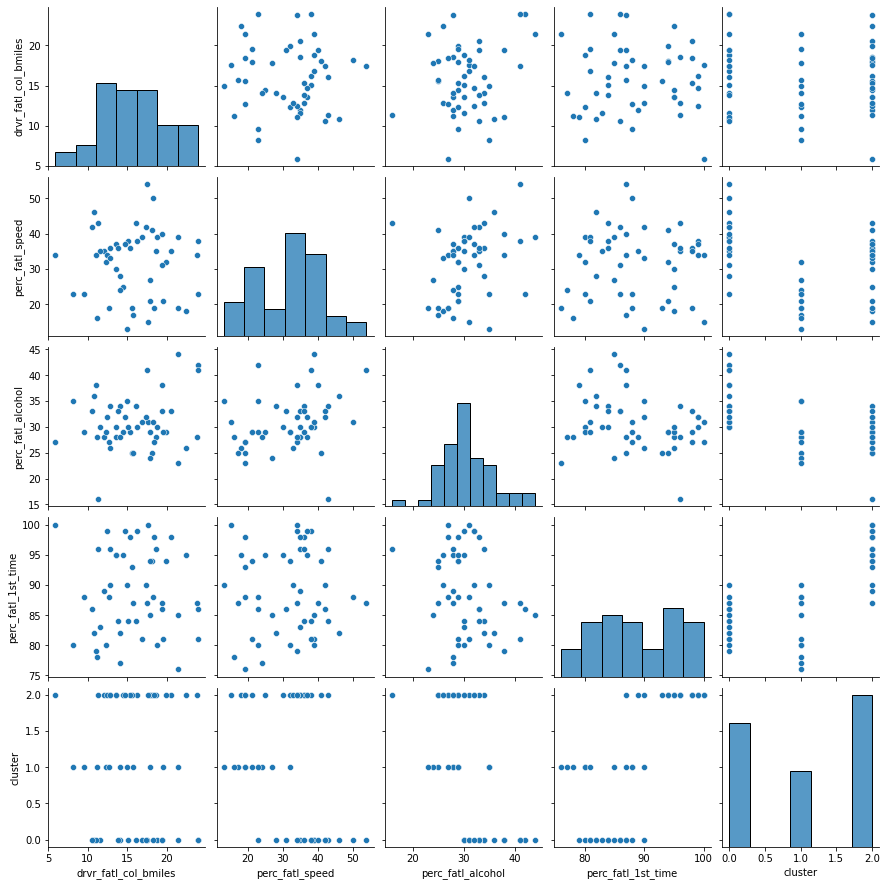

In [ ]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(df)

In [ ]:
#creating correlation matrix
corr_columns = df.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [ ]:
from sklearn import linear_model
#drvr_fat_col_bmiles is target which is dependent on features
# Create the features and target DataFrames
features = df[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = df['drvr_fatl_col_bmiles']

In [ ]:
# Create a linear regression object
model= linear_model.LinearRegression()

In [ ]:
# Fit a multivariate linear regression model
model.fit(features, target)

LinearRegression()

In [ ]:
# Retrieve the regression coefficients
fit_coef = model.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_scaled = sc.fit_transform(features)

In [ ]:
# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
# Fit the standardized data to the pca
pca.fit(features_scaled)

PCA()

([<matplotlib.axis.XTick at 0x7f56234ea690>,
 <a list of 3 Text major ticklabel objects>)

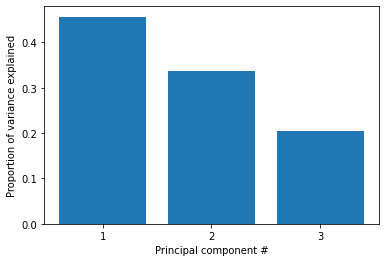

In [ ]:
# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [ ]:
# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.7947


In [ ]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = df[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = df['drvr_fatl_col_bmiles']

# Create a linear regression object
model = linear_model.LinearRegression()

# Fit a multivariate linear regression model
model.fit(features, target)

# Retrieve the regression coefficients
fit_coef = model.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

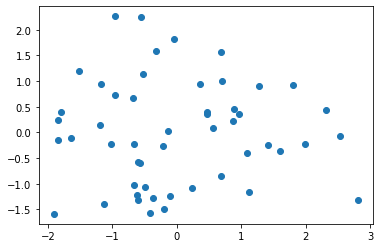

In [ ]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

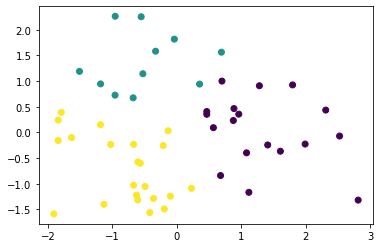

In [ ]:
# Create a KMeans object with 3 clusters, use random_state=8 
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comp1, p_comp2, c=km.labels_)

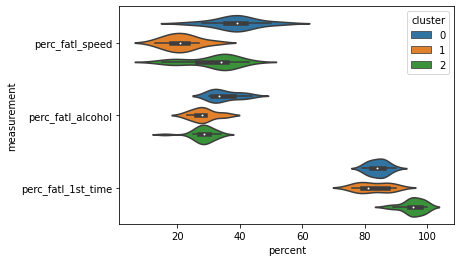

In [ ]:
# Create a new column with the labels from the KMeans clustering
df['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(df, id_vars='cluster', 
                   var_name='measurement', 
                   value_name='percent', 
                   value_vars=features)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x = melt_car['percent'], y = melt_car['measurement'], hue = melt_car['cluster'])

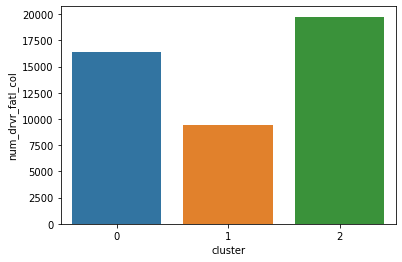

In [ ]:
# Read in the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `df` DataFrame with the `miles_driven` DataFrame
car_acc_miles = df.merge(miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = (car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles["million_miles_annually"])/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])